In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Import library**

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Define the transform to preprocess the images
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# split train and validation images

In [3]:
import os
# Load the training dataset
train_dataset = torchvision.datasets.ImageFolder(
    root=os.path.join('/kaggle/input/mnist-dataset/MNIST Dataset JPG format/MNIST - JPG - training'),
    transform=transform
)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])




# Create data loaders for training and validation

In [4]:
# Create data loaders for training and validation
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=1024,
    shuffle=False,
    num_workers=64
)

val_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=1024,
    shuffle=False,
    num_workers=64
)

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 64 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Load the testing dataset

In [5]:
# Load the testing dataset
test_dataset = torchvision.datasets.ImageFolder(
    root=os.path.join('/kaggle/input/mnist-dataset/MNIST Dataset JPG format/MNIST - JPG - testing'),
    transform=transform
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=256,
    shuffle=False,
    num_workers=64
)

# Define the model architecture

In [6]:
# Define the model architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(5 * 5 * 64, 64)  # Update the input size
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 5 * 5 * 64)  # Update the view size
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return nn.functional.softmax(x, dim=1)

# Create an instance of the model
# Define the loss function and optimizer
# Train the model

# Plotting the outputs

Epoch 1/100, Loss: 3.6852797853185777, Accuracy: 0.6360208333333334
Epoch 2/100, Loss: 3.2086341634709785, Accuracy: 0.8588125
Epoch 3/100, Loss: 3.046925078047083, Accuracy: 0.9419375
Epoch 4/100, Loss: 2.9822305719903173, Accuracy: 0.9726666666666667
Epoch 5/100, Loss: 2.972431482152736, Accuracy: 0.9774166666666667
Epoch 6/100, Loss: 2.964639775296475, Accuracy: 0.9809583333333334
Epoch 7/100, Loss: 2.9582746231809574, Accuracy: 0.983375
Epoch 8/100, Loss: 2.955203025899035, Accuracy: 0.984875
Epoch 9/100, Loss: 2.951141854549976, Accuracy: 0.98675
Epoch 10/100, Loss: 2.949504446476064, Accuracy: 0.987625
Epoch 11/100, Loss: 2.947816240026596, Accuracy: 0.9882708333333333
Epoch 12/100, Loss: 2.946440240170093, Accuracy: 0.988875
Epoch 13/100, Loss: 2.9430526317434107, Accuracy: 0.99025
Epoch 14/100, Loss: 2.941684124317575, Accuracy: 0.9913125
Epoch 15/100, Loss: 2.938866194258345, Accuracy: 0.992625
Epoch 16/100, Loss: 2.9387727088116584, Accuracy: 0.9925
Epoch 17/100, Loss: 2.9389

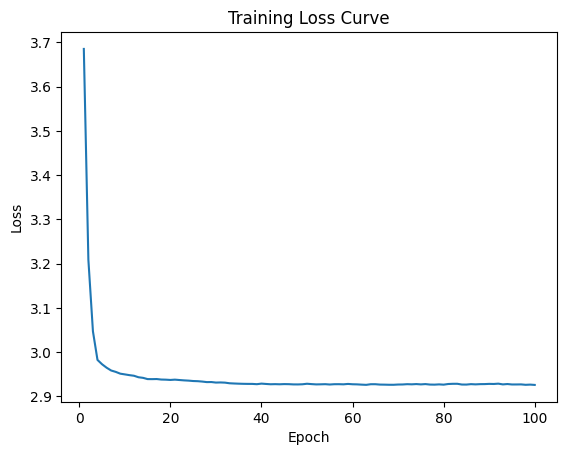

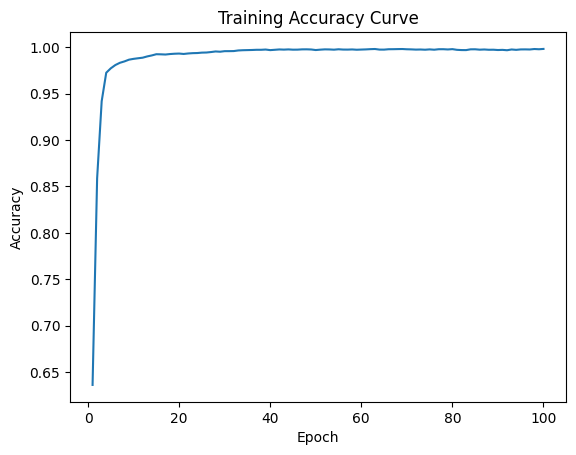

In [7]:
# Create an instance of the model
model = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)

# Train the model
num_epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


import matplotlib.pyplot as plt

# Initialize empty lists to store loss and accuracy values
train_loss_values = []
train_accuracy_values = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for images, labels in train_loader:
        # ... (rest of the training code)
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted_labels = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted_labels == labels).sum().item()

        running_loss += loss.item()

    # Calculate average loss and accuracy for the epoch
    average_loss = running_loss / len(train_loader)
    accuracy = correct_predictions / total_predictions

    # Append loss and accuracy values to the lists
    train_loss_values.append(average_loss)
    train_accuracy_values.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {average_loss}, Accuracy: {accuracy}")

# Plotting the loss curve
plt.plot(range(1, num_epochs + 1), train_loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# Plotting the accuracy curve
plt.plot(range(1, num_epochs + 1), train_accuracy_values)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Curve')
plt.show()


# Evaluate the model on the validation set

In [8]:
# Evaluate the model on the validation set
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy}%")

# Evaluate the model on the test set
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy}%")

Validation Accuracy: 99.03333333333333%
Test Accuracy: 99.15%
